## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

## Data Loading And Data Preparation

In [2]:
def data_prepare(data):
    index_names = ['ID', 'Cycle']
    op_names = ['OpSet1', 'OpSet2', 'OpSet3']
    sensor_names = ['SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21','SensorMeasure22', 'SensorMeasure23']
    df_train = pd.read_csv(data,sep = ' ', header = None)
    df_train.columns = index_names+op_names+sensor_names
    
    l = []
    for i in df_train['ID']:
        l.append(((df_train[df_train['ID']==i]['Cycle']).values)[-1])
    df_train['EOL'] = l
    
    df_train['LR'] = df_train['Cycle'].div(df_train['EOL'])
    
    labels=[]
    for i in range (0,len(df_train)):
        if np.array(df_train["LR"])[i] <= 0.6:
            labels.append(0)
        elif np.array(df_train["LR"])[i] <= 0.8 :
            labels.append(1)   
        else :
            labels.append(2)  
    df_train["labels"]=labels  
    return df_train

In [3]:
df_train1 = data_prepare('train_FD001.txt')
df_train2 = data_prepare('train_FD002.txt')
df_train3 = data_prepare('train_FD003.txt')
df_train4 = data_prepare('train_FD004.txt')

In [4]:
train_df = pd.concat([df_train1,df_train2,df_train3,df_train4])

In [5]:
train_df = train_df.drop(columns = ['EOL','LR'])

## EDA

In [6]:
train_df.columns

Index(['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1',
       'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
       'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9',
       'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12',
       'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
       'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
       'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21',
       'SensorMeasure22', 'SensorMeasure23', 'labels'],
      dtype='object')

In [7]:
train_df.shape

(160359, 29)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160359 entries, 0 to 61248
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               160359 non-null  int64  
 1   Cycle            160359 non-null  int64  
 2   OpSet1           160359 non-null  float64
 3   OpSet2           160359 non-null  float64
 4   OpSet3           160359 non-null  float64
 5   SensorMeasure1   160359 non-null  float64
 6   SensorMeasure2   160359 non-null  float64
 7   SensorMeasure3   160359 non-null  float64
 8   SensorMeasure4   160359 non-null  float64
 9   SensorMeasure5   160359 non-null  float64
 10  SensorMeasure6   160359 non-null  float64
 11  SensorMeasure7   160359 non-null  float64
 12  SensorMeasure8   160359 non-null  float64
 13  SensorMeasure9   160359 non-null  float64
 14  SensorMeasure10  160359 non-null  float64
 15  SensorMeasure11  160359 non-null  float64
 16  SensorMeasure12  160359 non-null  float

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,160359.0,105.553758,72.867325,1.0000,44.00000,89.0000,164.0000,260.0000
Cycle,160359.0,123.331338,83.538146,1.0000,57.00000,114.0000,173.0000,543.0000
OpSet1,160359.0,17.211973,16.527988,-0.0087,0.00130,19.9981,35.0015,42.0080
OpSet2,160359.0,0.410004,0.367938,-0.0006,0.00020,0.6200,0.8400,0.8420
OpSet3,160359.0,95.724344,12.359044,60.0000,100.00000,100.0000,100.0000,100.0000
SensorMeasure1,160359.0,485.840890,30.420388,445.0000,449.44000,489.0500,518.6700,518.6700
SensorMeasure2,160359.0,597.361022,42.478516,535.4800,549.96000,605.9300,642.3400,645.1100
SensorMeasure3,160359.0,1467.035653,118.175261,1242.6700,1357.36000,1492.8100,1586.5900,1616.9100
SensorMeasure4,160359.0,1260.956434,136.300073,1023.7700,1126.83000,1271.7400,1402.2000,1441.4900
SensorMeasure5,160359.0,9.894999,4.265554,3.9100,5.48000,9.3500,14.6200,14.6200


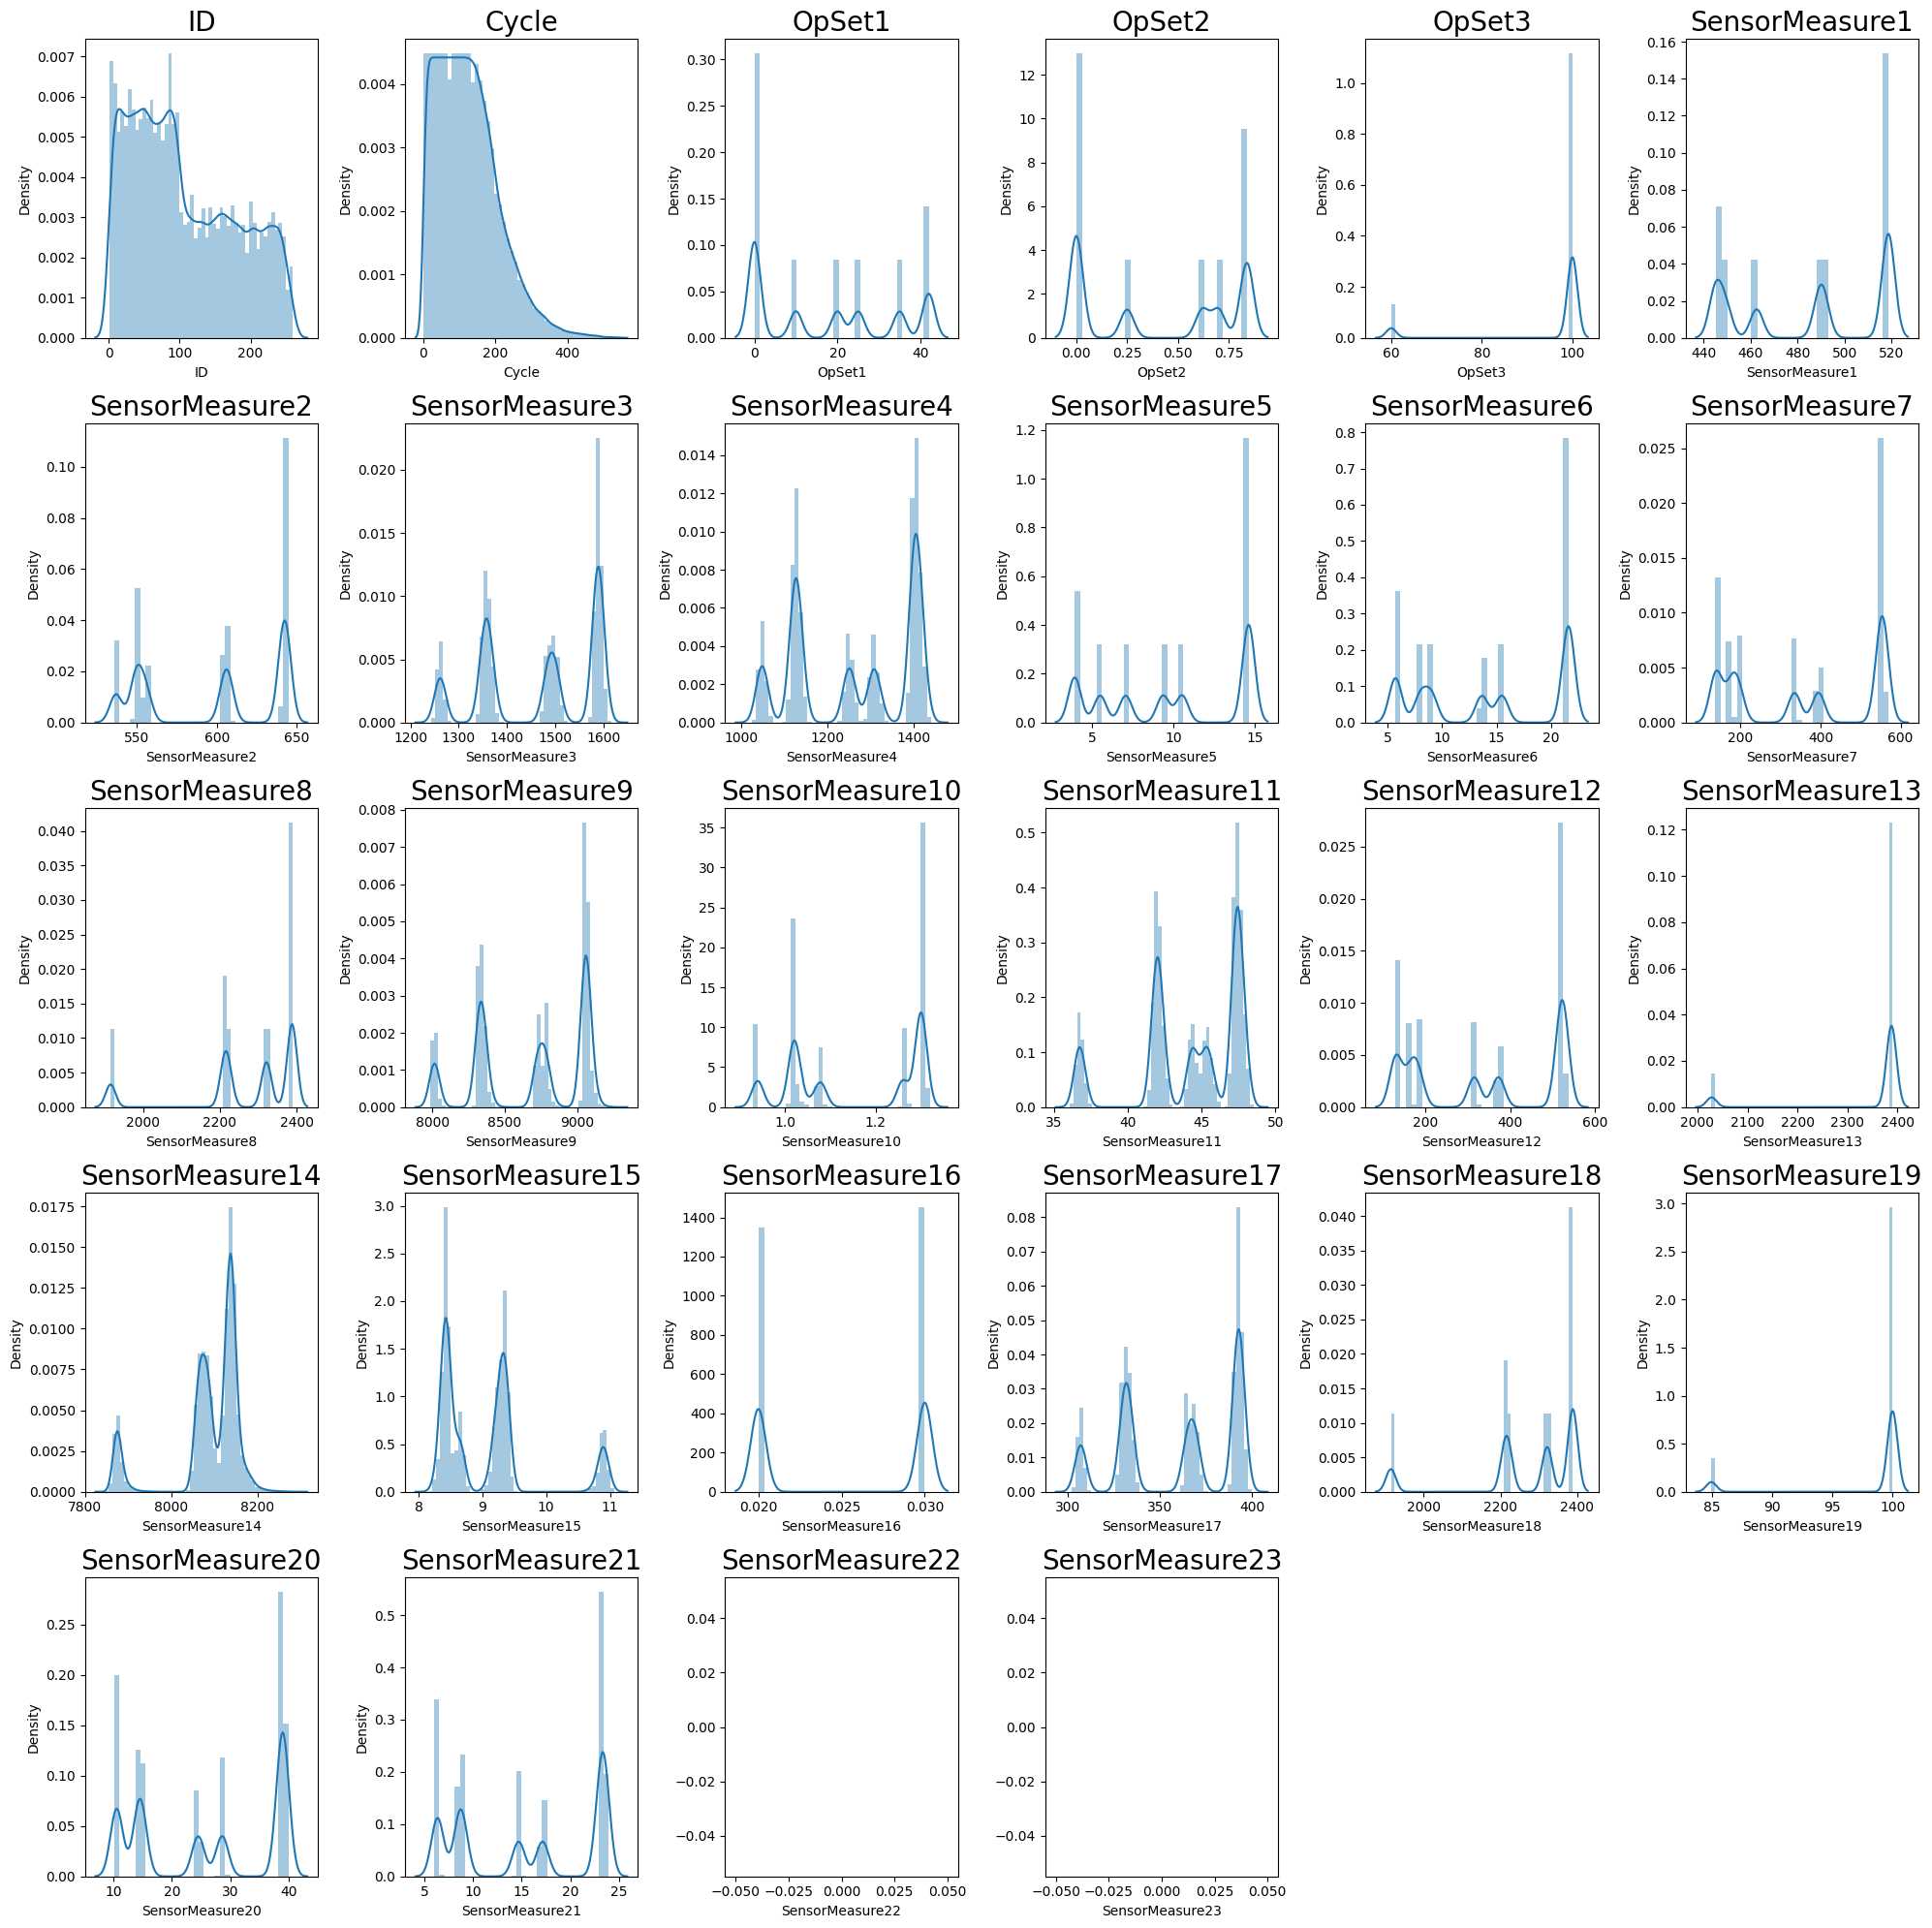

In [10]:
plt.figure(figsize=(20,20), facecolor="white")
plotnumber = 1

for column in train_df.columns[:28]:
    ax = plt.subplot(5,6, plotnumber)
    sns.distplot(train_df[column])
    plt.title(column,fontsize=20)
    plotnumber += 1

plt.tight_layout()

<AxesSubplot:>

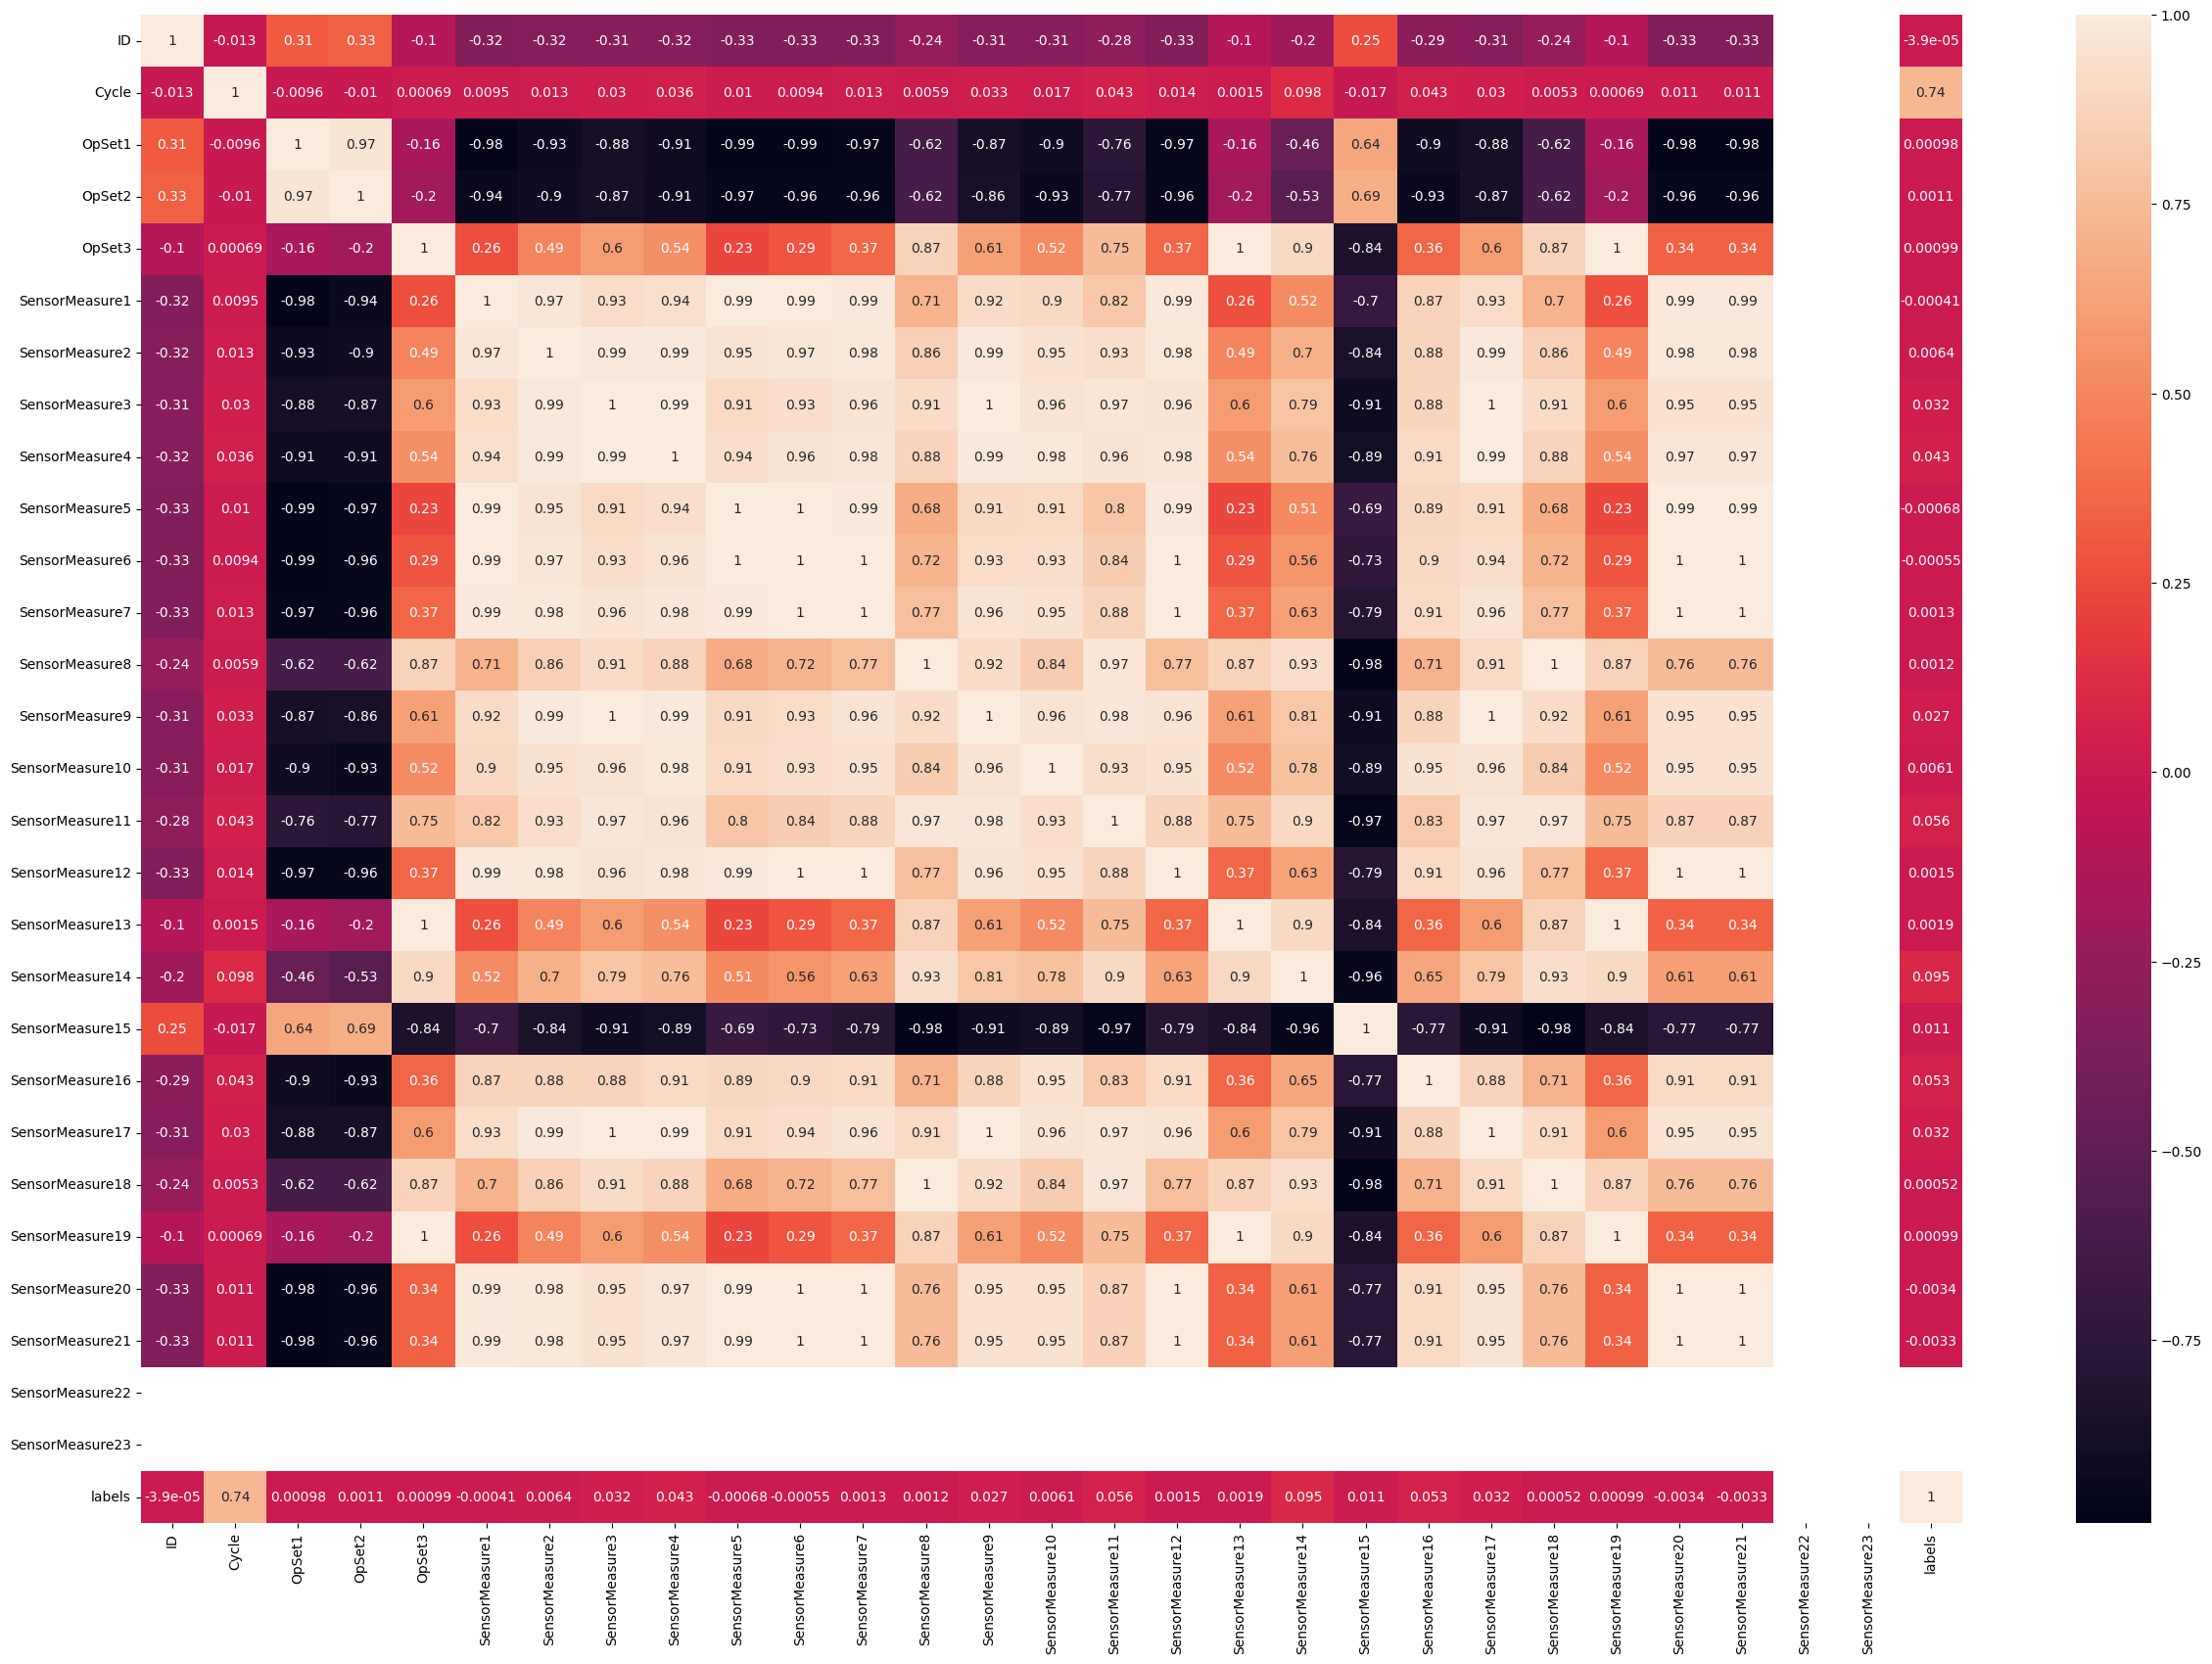

In [11]:
plt.figure(figsize= (30,20), facecolor="white")
sns.heatmap(train_df[train_df.columns].corr(), annot = True)

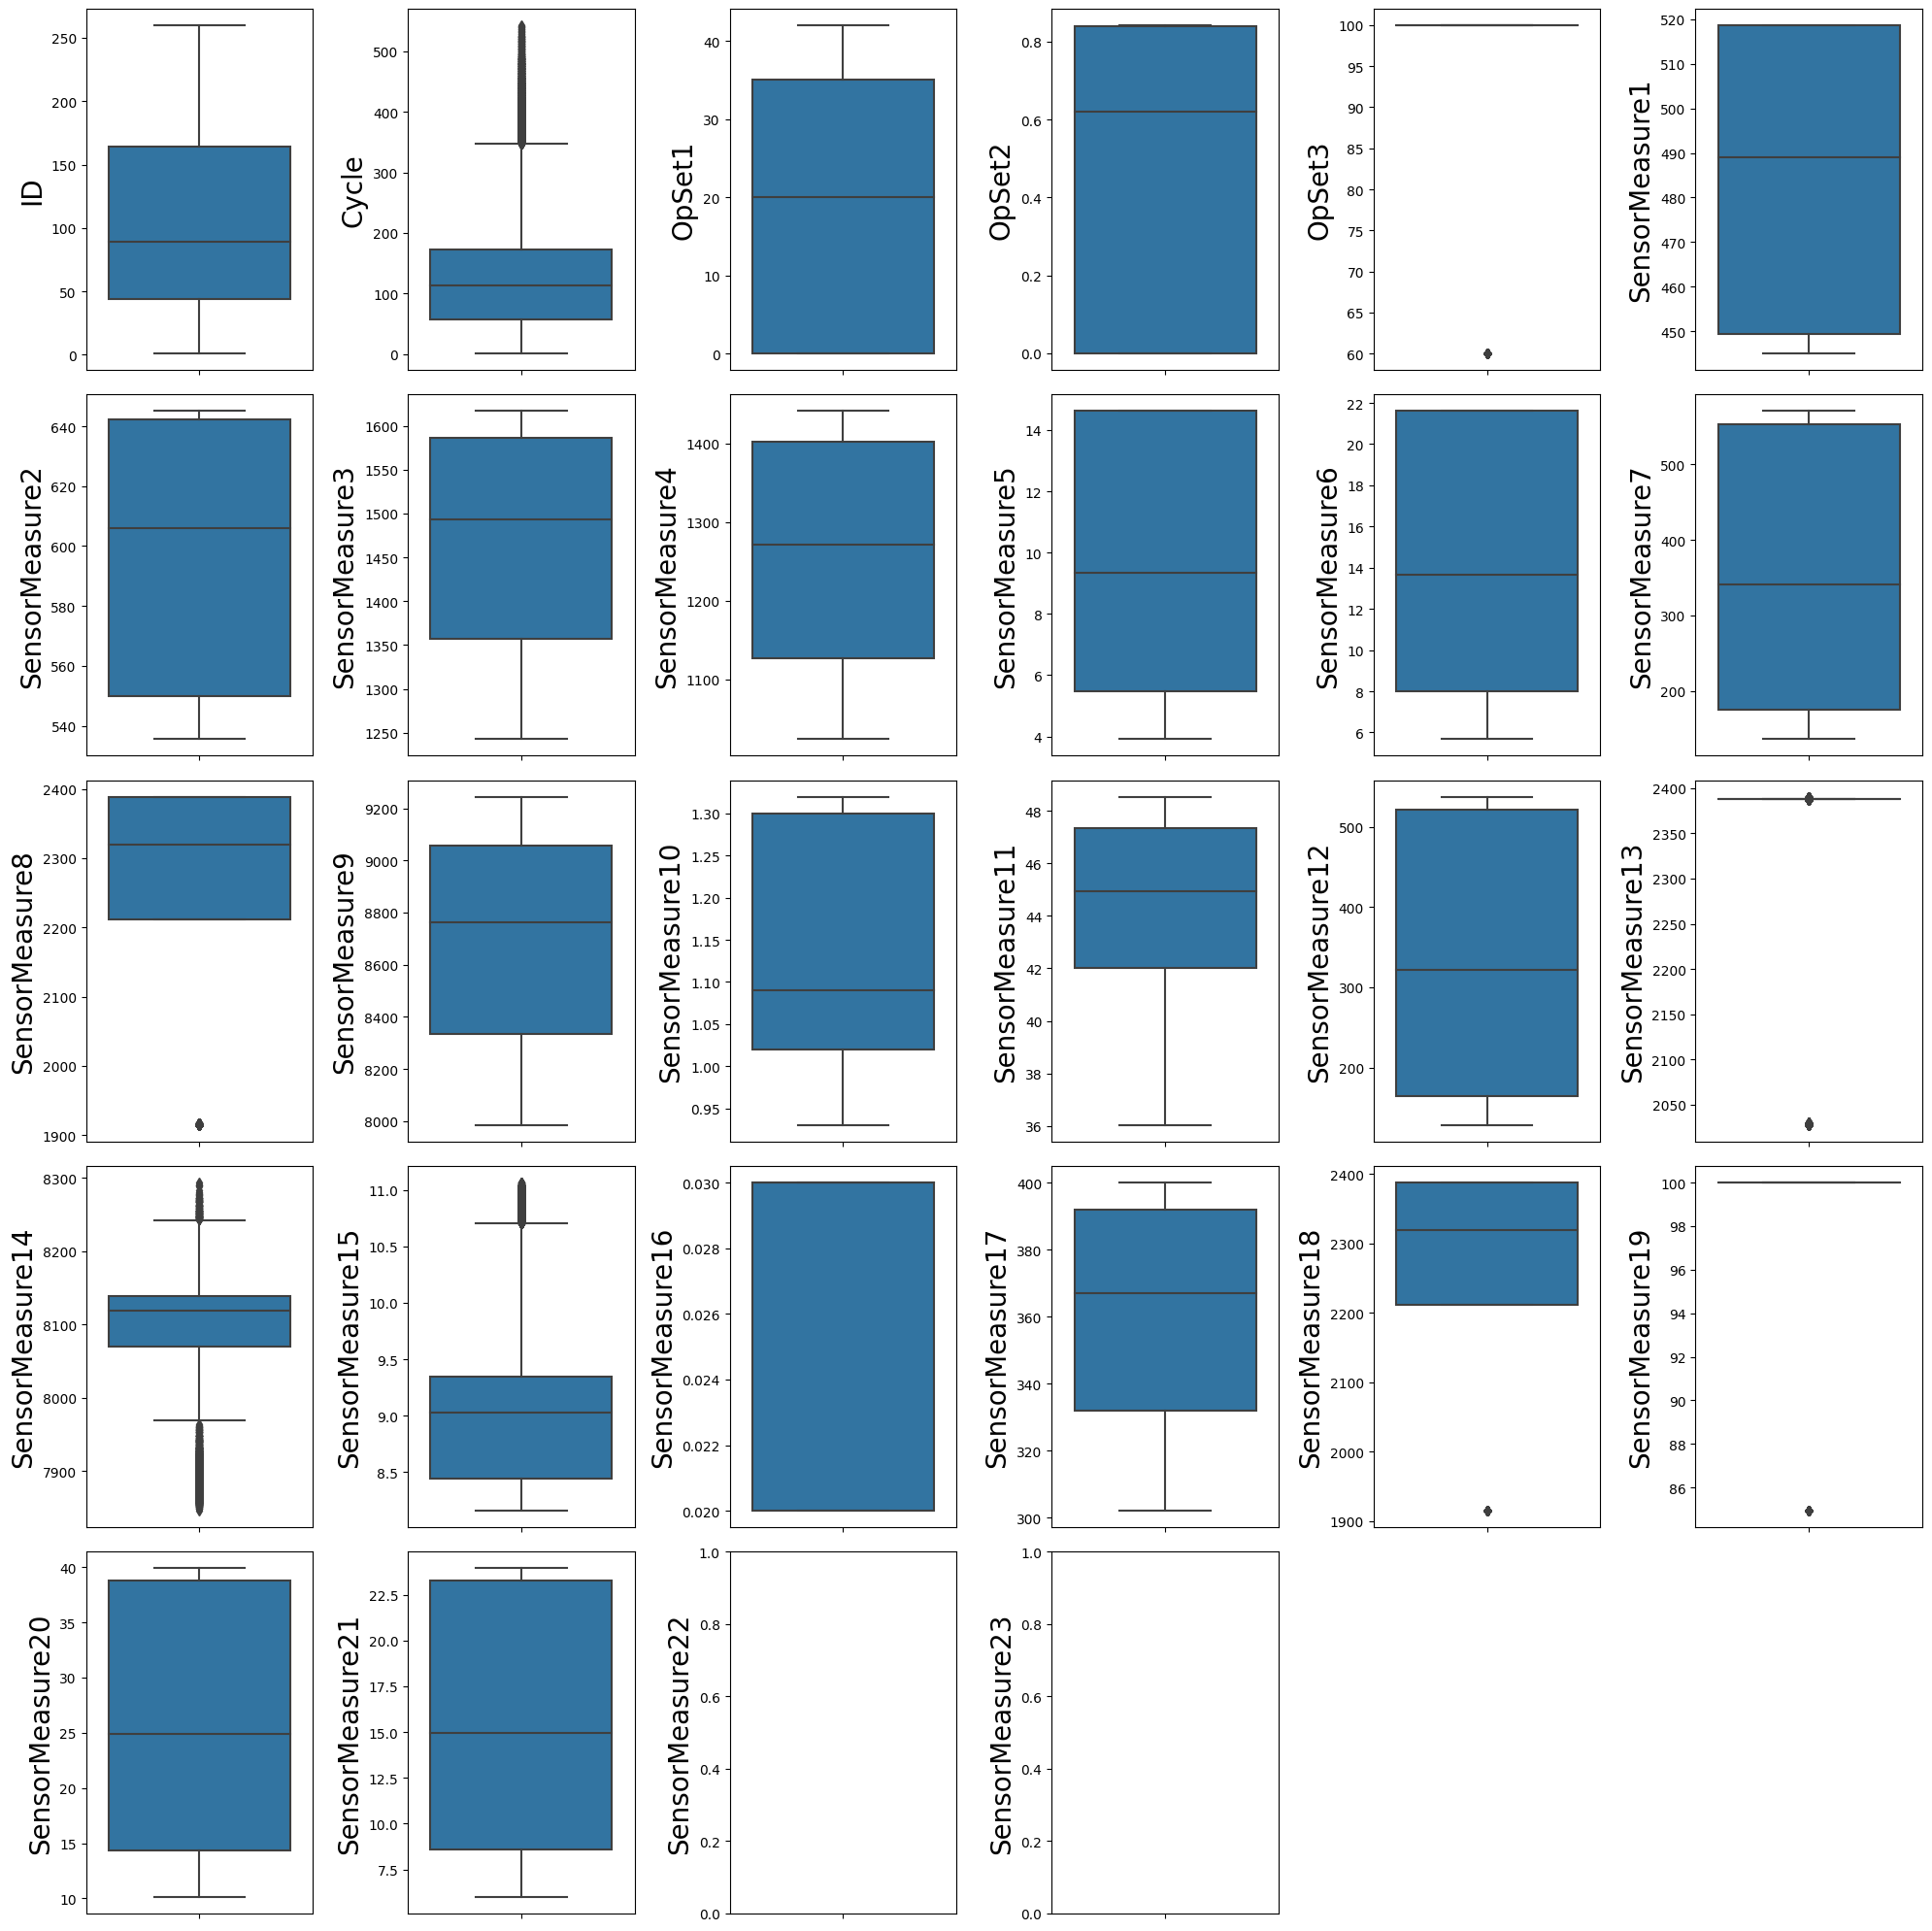

In [12]:
plt.figure(figsize= (20,20), facecolor="white")
plotnumber= 1
for column in train_df.columns[:28]:
    ax = plt.subplot(5,6, plotnumber)
    sns.boxplot(y = column, data = train_df)
    plt.ylabel(column, fontsize = 20)
    plotnumber += 1

plt.tight_layout()

##  Data Cleaning

In [13]:
train_df.drop(columns = ['ID','SensorMeasure22','SensorMeasure23'],inplace = True)

In [14]:
train_df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,2
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,2
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,2


In [15]:
x_scalar = train_df.drop(columns=['labels'],axis = 1)
y_scalar = train_df['labels']

In [16]:
scaler = StandardScaler()
arr = scaler.fit_transform(x_scalar)
sc_x = pd.DataFrame(arr)
sc_x.columns = train_df.columns[:25]

In [17]:
sc_x.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,-1.464382,-1.041429,-1.115418,0.345955,1.079185,1.046626,1.037990,1.024534,1.107714,1.115018,...,1.113752,0.345200,0.616065,-0.845217,0.963589,1.009022,0.801655,0.345955,1.121962,1.119494
1,-1.452411,-1.041272,-1.115146,0.345955,1.079185,1.054395,1.055929,1.043169,1.107714,1.115018,...,1.117528,0.345649,0.527629,-0.828851,0.963589,1.009022,0.801655,0.345955,1.116830,1.120150
2,-1.440440,-1.041647,-1.113516,0.345955,1.079185,1.059103,1.023520,1.050946,1.107714,1.115018,...,1.118380,0.345289,0.549211,-0.847479,0.963589,0.944550,0.801655,0.345955,1.112553,1.108831
3,-1.428470,-1.041344,-1.114331,0.345955,1.079185,1.059103,0.979517,1.033851,1.107714,1.115018,...,1.121060,0.345739,0.556653,-0.913473,0.963589,1.009022,0.801655,0.345955,1.106566,1.113065
4,-1.416499,-1.041502,-1.114874,0.345955,1.079185,1.059574,0.980025,1.065766,1.107714,1.115018,...,1.116979,0.345379,0.556281,-0.832044,0.963589,1.041258,0.801655,0.345955,1.108277,1.117413


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['vif']=[variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_df['feature'] = sc_x.columns

In [19]:
vif_df

,vif,feature
0,2.216689e+00,Cycle
1,6.917332e+06,OpSet1
2,3.049246e+05,OpSet2
3,inf,OpSet3
4,1.189289e+09,SensorMeasure1
5,1.817037e+04,SensorMeasure2
6,8.102835e+02,SensorMeasure3
7,9.268448e+02,SensorMeasure4
8,8.286152e+06,SensorMeasure5
9,4.686595e+05,SensorMeasure6


In [20]:
train_df.drop(columns = ['OpSet3','SensorMeasure19'],inplace = True)

In [21]:
train_df.head()

,Cycle,OpSet1,OpSet2,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,39.06,23.4190,0
1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,39.00,23.4236,0
2,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,38.95,23.3442,0
3,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,38.88,23.3739,0
4,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,38.90,23.4044,0


## Divide the Dependent and Indpendent Feature

In [22]:
x = train_df.drop(columns = ['labels'])

In [23]:
y = train_df['labels']

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=0)

## Traning Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

## Model Evaluation

0.8936767273634323

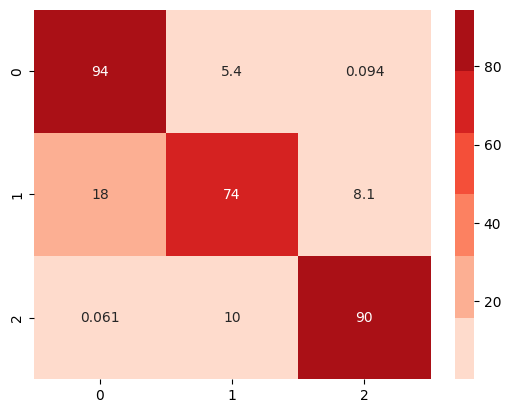

In [26]:
y_pred_RF = Rf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test,y_pred_RF,normalize='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm,annot = True,cmap = colormap)

accuracy_score(y_test,y_pred_RF)

1.0

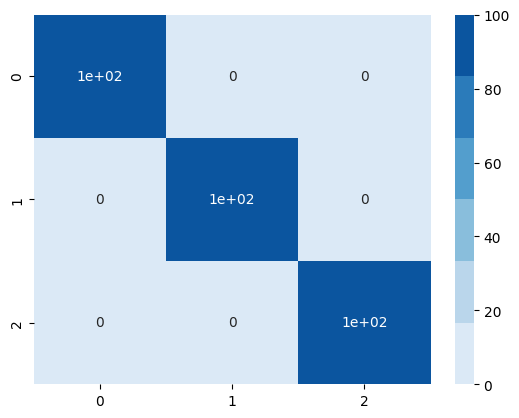

In [28]:
y_pred_RF = Rf.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train,y_pred_RF,normalize='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm,annot = True,cmap = colormap)

accuracy_score(y_train,y_pred_RF)